# Задание: предсказать цену жилья

Данные - 79 переменных, описывающих (почти) все аспекты жилых домов в Эймсе, штат Айова
https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

Загружаем данные

In [452]:
import pandas as pd

data = pd.read_csv(r'C:\Users\David Hilbert\JupyterNotebook Projects\Предсказываем цену на жилье\train.csv')
test_data = pd.read_csv(r'C:\Users\David Hilbert\JupyterNotebook Projects\Предсказываем цену на жилье\test.csv')

# Сразу удаляем поле с идентификатором
data.drop(columns='Id', inplace=True)
test_data.drop(columns='Id', inplace=True)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Смотрим размер датасета

In [454]:
data.shape

(1460, 80)

In [455]:
test_data.shape

(1459, 79)

Смотрим из каких полей состоят данные:

In [457]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [458]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1455 non-null   object 
 2   LotFrontage    1232 non-null   float64
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          107 non-null    object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

Числовые признак - те, что имеют типа integer и float, категориальные - все остальные

In [460]:
numerical_features = list(data.columns[(data.dtypes == 'float64') | (data.dtypes == 'int64')])
categorical_features = list(data.columns[data.dtypes == object])

In [461]:
numerical_features_td = list(test_data.columns[(test_data.dtypes == 'float64') | (test_data.dtypes == 'int64')])
categorical_features_td = list(test_data.columns[test_data.dtypes == object])

Посмотрим внимательно на категориальные признаки:

In [463]:
data[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Посмотрим в каких вещественных признаках есть пропуски и сколько их

In [465]:
data[numerical_features].isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

Заполним пропуски нулями

In [467]:
data[numerical_features] = data[numerical_features].fillna(0)

In [468]:
test_data[numerical_features_td] = test_data[numerical_features_td].fillna(0)

In [469]:
data[categorical_features].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

Посчитаем итоговое суммарное количество уникальных значение закодированных категориальных признаков

In [471]:
number_of_categorical = sum([data[field].nunique(dropna=False) for field in categorical_features])
number_of_categorical

267

In [472]:
number_of_categorical = sum([test_data[field].nunique(dropna=False) for field in categorical_features_td])
number_of_categorical

255

Кодируем категориальные признаки с помощью one-hot-encoding:

In [474]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder()
encoder.fit(data[categorical_features])
categories = []
for i, feature in enumerate(categorical_features):
    categories.extend([f'{feature}: {value}' for value in encoder.categories_[i]])
data.loc[:, categories] = encoder.transform(data[categorical_features]).toarray().astype(int)

categories

['MSZoning: C (all)',
 'MSZoning: FV',
 'MSZoning: RH',
 'MSZoning: RL',
 'MSZoning: RM',
 'Street: Grvl',
 'Street: Pave',
 'Alley: Grvl',
 'Alley: Pave',
 'Alley: nan',
 'LotShape: IR1',
 'LotShape: IR2',
 'LotShape: IR3',
 'LotShape: Reg',
 'LandContour: Bnk',
 'LandContour: HLS',
 'LandContour: Low',
 'LandContour: Lvl',
 'Utilities: AllPub',
 'Utilities: NoSeWa',
 'LotConfig: Corner',
 'LotConfig: CulDSac',
 'LotConfig: FR2',
 'LotConfig: FR3',
 'LotConfig: Inside',
 'LandSlope: Gtl',
 'LandSlope: Mod',
 'LandSlope: Sev',
 'Neighborhood: Blmngtn',
 'Neighborhood: Blueste',
 'Neighborhood: BrDale',
 'Neighborhood: BrkSide',
 'Neighborhood: ClearCr',
 'Neighborhood: CollgCr',
 'Neighborhood: Crawfor',
 'Neighborhood: Edwards',
 'Neighborhood: Gilbert',
 'Neighborhood: IDOTRR',
 'Neighborhood: MeadowV',
 'Neighborhood: Mitchel',
 'Neighborhood: NAmes',
 'Neighborhood: NPkVill',
 'Neighborhood: NWAmes',
 'Neighborhood: NoRidge',
 'Neighborhood: NridgHt',
 'Neighborhood: OldTown',
 'Ne

In [475]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder()
encoder.fit(test_data[categorical_features_td])
categories_td = []
for i, feature in enumerate(categorical_features_td):
    categories_td.extend([f'{feature}: {value}' for value in encoder.categories_[i]])
test_data.loc[:, categories_td] = encoder.transform(test_data[categorical_features_td]).toarray().astype(int)

categories_td

['MSZoning: C (all)',
 'MSZoning: FV',
 'MSZoning: RH',
 'MSZoning: RL',
 'MSZoning: RM',
 'MSZoning: nan',
 'Street: Grvl',
 'Street: Pave',
 'Alley: Grvl',
 'Alley: Pave',
 'Alley: nan',
 'LotShape: IR1',
 'LotShape: IR2',
 'LotShape: IR3',
 'LotShape: Reg',
 'LandContour: Bnk',
 'LandContour: HLS',
 'LandContour: Low',
 'LandContour: Lvl',
 'Utilities: AllPub',
 'Utilities: nan',
 'LotConfig: Corner',
 'LotConfig: CulDSac',
 'LotConfig: FR2',
 'LotConfig: FR3',
 'LotConfig: Inside',
 'LandSlope: Gtl',
 'LandSlope: Mod',
 'LandSlope: Sev',
 'Neighborhood: Blmngtn',
 'Neighborhood: Blueste',
 'Neighborhood: BrDale',
 'Neighborhood: BrkSide',
 'Neighborhood: ClearCr',
 'Neighborhood: CollgCr',
 'Neighborhood: Crawfor',
 'Neighborhood: Edwards',
 'Neighborhood: Gilbert',
 'Neighborhood: IDOTRR',
 'Neighborhood: MeadowV',
 'Neighborhood: Mitchel',
 'Neighborhood: NAmes',
 'Neighborhood: NPkVill',
 'Neighborhood: NWAmes',
 'Neighborhood: NoRidge',
 'Neighborhood: NridgHt',
 'Neighborhood:

In [476]:
common = set(categories) & set(categories_td)
categories = [item for item in categories if item in common]
categories_td = [item for item in categories_td if item in common]

In [477]:
len(categories)

248

# Обучение модели

Делим данные на обучение и тест:

In [692]:
from sklearn.model_selection import train_test_split

train_features = numerical_features + categories
train_features.remove('SalePrice')

X = data[train_features]
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

Обучаем случайный лес с большим количеством деревьев:

In [694]:
%%time
from sklearn.ensemble import RandomForestRegressor


RF = RandomForestRegressor(n_estimators=500, n_jobs=4, verbose=1, oob_score=True,
                              max_features=X_train.shape[1] // 3)
RF.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    1.2s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.4s finished


CPU times: total: 6 s
Wall time: 1.79 s


RandomForestRegressor(max_features=94, n_estimators=500, n_jobs=4,
                      oob_score=True, verbose=1)

Для удобства создаем функцию, которая будет возвращать метрики сразу на обучающих и тестовых данных:

In [696]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    # избегаем деления на ноль
    return np.mean(np.where(denominator == 0, 0, np.abs(y_true - y_pred) / denominator)) * 100

def get_metrics(model, digits=0):
    results = []
    
    # Предсказания для треїнга
    y_pred_train = model.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mse_train = mean_squared_error(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train) * 100
    smape_train = smape(y_train, y_pred_train)
    
    results.append(['Train', mae_train, mse_train, r2_train, smape_train])
    
    # Предсказания для теста
    y_pred_test = model.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test) * 100
    smape_test = smape(y_test, y_pred_test)
    
    results.append(['Test', mae_test, mse_test, r2_test, smape_test])
    
    return np.round(pd.DataFrame(columns=['Group', 'MAE', 'MSE', 'R2', 'SMAPE'], data=results), digits)

Смотрим метрики

In [698]:
get_metrics(RF)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    0.0s finished


,Group,MAE,MSE,R2,SMAPE
0,Train,6231.0,1.213849e+08,98.0,4.0
1,Test,17759.0,1.072473e+09,86.0,10.0


Посмотрим как меняется метрика MAE в зависимости от количества деревьев:

In [771]:
%%time
pred_train = np.hstack([estimator.predict(X_train.values).reshape((-1, 1)) for estimator in RF.estimators_])
pred_test = np.hstack([estimator.predict(X_test.values).reshape((-1, 1)) for estimator in RF.estimators_])

CPU times: total: 1.42 s
Wall time: 1.42 s


In [772]:
mae = {'Train': [], 'Test': []}
for i in range(1, pred_train.shape[1]):
    mae['Train'].append(mean_absolute_error(y_train, pred_train[:, :i].mean(axis=1)))
for i in range(1, pred_train.shape[1]):
    mae['Test'].append(mean_absolute_error(y_test, pred_test[:, :i].mean(axis=1)))

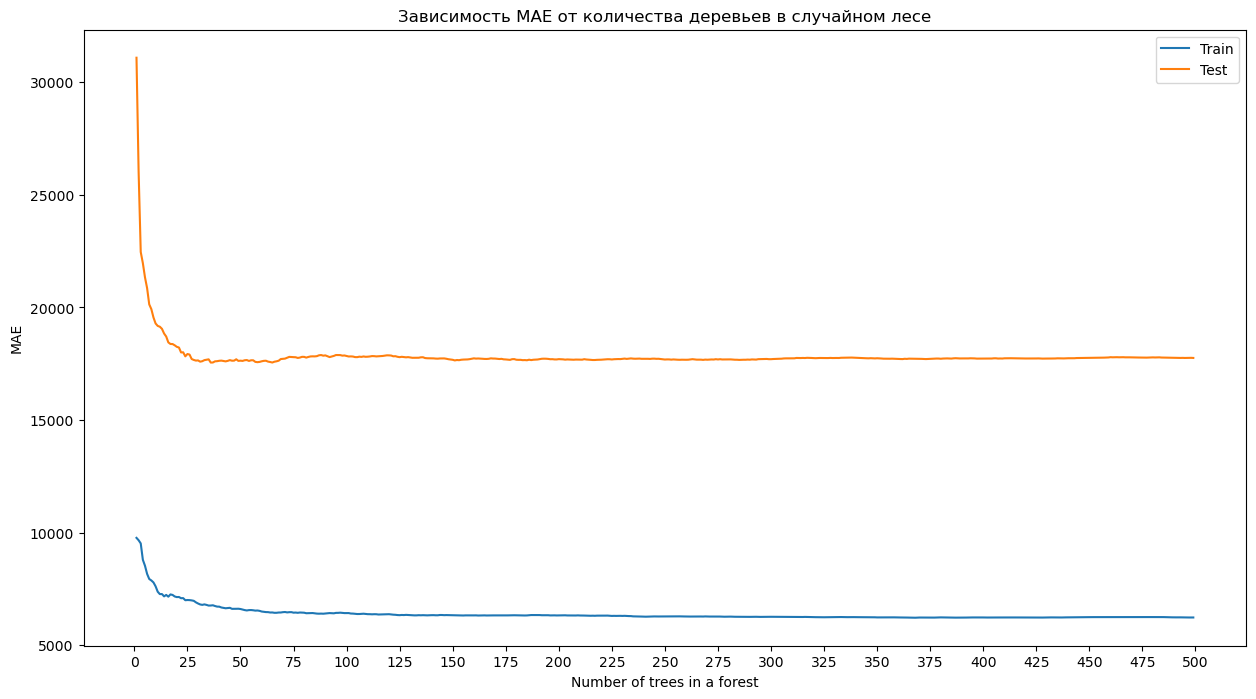

In [774]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(range(1, pred_train.shape[1]), mae['Train'], label='Train')
plt.plot(range(1, pred_test.shape[1]), mae['Test'], label='Test')
plt.xticks(ticks=np.arange(0, pred_train.shape[1] + 1, 25))
plt.title('Зависимость MAE от количества деревьев в случайном лесе')
plt.xlabel('Number of trees in a forest')
plt.ylabel('MAE')
plt.legend()
plt.show()

Для примера возьмем 150 деревьев

In [719]:
best_RF = RandomForestRegressor(n_estimators=150, n_jobs=4, verbose=1, oob_score=True)
best_RF.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.9s finished


RandomForestRegressor(n_estimators=150, n_jobs=4, oob_score=True, verbose=1)

In [720]:
get_metrics(best_RF)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed:    0.0s finished


,Group,MAE,MSE,R2,SMAPE
0,Train,6596.0,1.271668e+08,98.0,4.0
1,Test,17937.0,1.047549e+09,86.0,10.0


Выведем признаки с наибольшей важностью

In [741]:
pd.DataFrame(data={'feature': train_features, 
                   'importance': RF.feature_importances_}).sort_values('importance', ascending=False).iloc[:10]

,feature,importance
3,OverallQual,0.253098
15,GrLivArea,0.118543
25,GarageCars,0.099199
159,ExterQual: TA,0.065884
11,TotalBsmtSF,0.043085
26,GarageArea,0.038758
12,1stFlrSF,0.036990
5,YearBuilt,0.035745
2,LotArea,0.023540
171,BsmtQual: Ex,0.022428


## Посчитаем модель на тестовых данных

In [747]:
train_features = numerical_features_td + categories_td
x_test = test_data[train_features]

In [749]:
predictions = model.predict(x_test)

# Построем модель деревья решений

In [743]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24)

In [751]:
from sklearn.tree import DecisionTreeRegressor


tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

DecisionTreeRegressor()

Считаем метрики

In [754]:
get_metrics(tree)

,Group,MAE,MSE,R2,SMAPE
0,Train,0.0,0.000000e+00,100.0,0.0
1,Test,26442.0,2.172174e+09,72.0,15.0


Произведем подбор гипрепараметров

In [756]:
from sklearn.model_selection import GridSearchCV


grid = {'max_depth': [1, 2, 3, 5, 10, None],
        'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'min_samples_leaf': [1, 5, 10, 50],
        'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1]}
search = GridSearchCV(tree, grid)
search.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [1, 2, 3, 5, 10, None],
                         'min_impurity_decrease': [0.0, 0.01, 0.05, 0.1],
                         'min_samples_leaf': [1, 5, 10, 50]})

Построим модель с лушчими параметрами

In [758]:
tree = DecisionTreeRegressor(**search.best_params_,)
tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=5,
                      min_impurity_decrease=0.1)

Считаем метрики

In [760]:
get_metrics(tree)

,Group,MAE,MSE,R2,SMAPE
0,Train,20119.0,8.134967e+08,86.0,11.0
1,Test,27466.0,2.081026e+09,73.0,15.0


Выведем наиболее важные признаки

In [762]:
pd.DataFrame(data={'feature': train_features, 
                   'importance': tree.feature_importances_}).sort_values('importance', ascending=False).iloc[:10]

,feature,importance
3,OverallQual,0.600525
25,GarageCars,0.148409
15,GrLivArea,0.104184
11,TotalBsmtSF,0.038512
12,1stFlrSF,0.030413
8,BsmtFinSF1,0.018571
17,BsmtHalfBath,0.010151
21,KitchenAbvGr,0.008652
24,GarageYrBlt,0.008304
210,CentralAir: Y,0.005399


# Построим модель линейной регрессии

## 1. C L-2 регуляризацией

In [763]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Определите диапазон значений alpha, которые хотите проверить
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

# Создаем модель Ridge
ridge = Ridge()

# Настраиваем GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Обучение моделей и поиск лучших гиперпараметров
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшее значение alpha:", grid_search.best_params_)

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания на тестовых данных
predictions = best_model.predict(X_test)

Лучшее значение alpha: {'alpha': 10}


In [764]:
get_metrics(best_model)

,Group,MAE,MSE,R2,SMAPE
0,Train,15099.0,5.789336e+08,90.0,9.0
1,Test,19115.0,1.156342e+09,85.0,11.0


## 1. C L-1 регуляризацией

In [765]:
lasso = Lasso()

# Настраиваем GridSearchCV
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Обучение моделей и поиск лучших гиперпараметров
grid_search.fit(X_train, y_train)

# Лучшие параметры
print("Лучшее значение alpha:", grid_search.best_params_)

# Лучшая модель
best_model = grid_search.best_estimator_

# Предсказания на тестовых данных
predictions = best_model.predict(X_test)

Лучшее значение alpha: {'alpha': 100}


In [766]:
get_metrics(best_model)

,Group,MAE,MSE,R2,SMAPE
0,Train,14992.0,5.428464e+08,91.0,9.0
1,Test,18963.0,1.137997e+09,85.0,11.0


# Строим модели градиентного бустинга

In [786]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

### 1. XGBoost модель

In [810]:
# Параметры для XGBoost
param_grid_xgb = {
    'n_estimators': [10, 50, 100, 200, 300],        # Количество деревьев
    'max_depth': [3, 6, 9, 15, 30],                 # Максимальная глубина каждого дерева
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 2.0],      # Скорость обучения (шаг градиентного спуска)
    'subsample': [0.1, 0.5, 1.0, 5.0],           # Доля обучающих данных, используемых для обучения каждого дерева
    'colsample_bytree': [0.1, 0.5, 1.0, 5.0]     # Доля признаков, выбираемых для построения каждого дерева
}

In [812]:
# Для XGBoost
grid_xgb = GridSearchCV(
    estimator=xgb.XGBRegressor(),
    param_grid=param_grid_xgb,
    scoring='neg_mean_squared_error',  # метрика оценки (чем больше, тем лучше; берется знак минус)
    cv=5,                              # кипличность фолдов кросс-валидации
    verbose=1,                         # вывод процесса поиска
    n_jobs=-1                          # использование всех ядер процессора
)
grid_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.1, 0.5, 1.0, 5.0],
                         'learning_rate': [0.01, 0.1, 0.2, 0.5, 2.0],
                         'max_depth': [3, 6, 9, 15, 30],
                         'n_estimators': [10, 50, 100, 200, 300],
                         'subsample': [0.1, 0.5, 1.0, 5.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [820]:
# Лучшие параметры
print("Лучшее значение alpha:", grid_xgb.best_params_)

Лучшее значение alpha: {'colsample_bytree': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}


In [822]:
get_metrics(grid_xgb)

,Group,MAE,MSE,R2,SMAPE
0,Train,7964.0,118433967.0,98.0,5.0
1,Test,16732.0,871648391.0,89.0,9.0


### 2. LightGBM модель

In [833]:
import re

# Функция для проверки и очистки названий колонок
def clean_column_names(df):
    # Выводим названия признаков, содержащих недопустимые символы
    invalid_columns = [col for col in df.columns if re.search(r'[^a-zA-Z0-9_]', col)]
    if invalid_columns:
        print("Обнаружены признаки с неподходящими символами:", invalid_columns)
        # Заменяем все недопустимые символы на '_'
        df.columns = df.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)
        print("Названия признаков после очистки:", list(df.columns))
    else:
        print("Все названия признаков подходят.")
    return df

# Проверяем и очищаем X_train
X_train = clean_column_names(X_train)

# Проверяем и очищаем X_test
X_test = clean_column_names(X_test)

Обнаружены признаки с неподходящими символами: ['MSZoning: C (all)', 'MSZoning: FV', 'MSZoning: RH', 'MSZoning: RL', 'MSZoning: RM', 'Street: Grvl', 'Street: Pave', 'Alley: Grvl', 'Alley: Pave', 'Alley: nan', 'LotShape: IR1', 'LotShape: IR2', 'LotShape: IR3', 'LotShape: Reg', 'LandContour: Bnk', 'LandContour: HLS', 'LandContour: Low', 'LandContour: Lvl', 'Utilities: AllPub', 'LotConfig: Corner', 'LotConfig: CulDSac', 'LotConfig: FR2', 'LotConfig: FR3', 'LotConfig: Inside', 'LandSlope: Gtl', 'LandSlope: Mod', 'LandSlope: Sev', 'Neighborhood: Blmngtn', 'Neighborhood: Blueste', 'Neighborhood: BrDale', 'Neighborhood: BrkSide', 'Neighborhood: ClearCr', 'Neighborhood: CollgCr', 'Neighborhood: Crawfor', 'Neighborhood: Edwards', 'Neighborhood: Gilbert', 'Neighborhood: IDOTRR', 'Neighborhood: MeadowV', 'Neighborhood: Mitchel', 'Neighborhood: NAmes', 'Neighborhood: NPkVill', 'Neighborhood: NWAmes', 'Neighborhood: NoRidge', 'Neighborhood: NridgHt', 'Neighborhood: OldTown', 'Neighborhood: SWISU', 

In [835]:
# Параметры для LightGBM
param_grid_lgb = {
    'n_estimators': [10, 50, 100, 200],             # Количество итераций (деревьев)
    'num_leaves': [3, 9, 27, 60, 120],                 # Максимальное число листьев в дереве
    'learning_rate': [0.01, 0.1, 0.5, 2.0],           # Скорость обучения
    'max_depth': [-1, 5, 10, 30, 60],              # Максимальная глубина дерева (-1 — без ограничения)
}

In [838]:
# для LightGBM
grid_lgb = GridSearchCV(
    estimator=lgb.LGBMRegressor(),
    param_grid=param_grid_lgb,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_lgb.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001851 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3168
[LightGBM] [Info] Number of data points in the train set: 1095, number of used features: 188
[LightGBM] [Info] Start training from score 180833.931507
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

GridSearchCV(cv=5, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 2.0],
                         'max_depth': [-1, 5, 10, 30, 60],
                         'n_estimators': [10, 50, 100, 200],
                         'num_leaves': [3, 9, 27, 60, 120]},
             scoring='neg_mean_squared_error', verbose=1)

In [840]:
# Лучшие параметры
print("Лучшее значение alpha:", grid_lgb.best_params_)

Лучшее значение alpha: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'num_leaves': 9}


In [846]:
get_metrics(grid_lgb)

,Group,MAE,MSE,R2,SMAPE
0,Train,10272.0,2.450129e+08,96.0,6.0
1,Test,17828.0,1.002373e+09,87.0,9.0


### 3. CatBoost модель

In [851]:
# Параметры для CatBoost
param_grid_cb = {
    'iterations': [10, 50, 100, 200],               # Количество деревьев
    'depth': [4, 6, 8, 12, 20],                     # Максимальная глубина дерева
    'learning_rate': [0.01, 0.1, 0.5, 2.0],           # Скорость обучения
}

In [853]:
# для CatBoost
grid_cb = GridSearchCV(
    estimator=CatBoostRegressor(verbose=0),
    param_grid=param_grid_cb,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)
grid_cb.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x00000209CE2A7F20>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 12, 20],
                         'iterations': [10, 50, 100, 200],
                         'learning_rate': [0.01, 0.1, 0.5, 2.0]},
             scoring='neg_mean_squared_error', verbose=1)

In [855]:
# Лучшие параметры
print("Лучшее значение alpha:", grid_cb.best_params_)

Лучшее значение alpha: {'depth': 8, 'iterations': 200, 'learning_rate': 0.1}


In [857]:
get_metrics(grid_cb)

,Group,MAE,MSE,R2,SMAPE
0,Train,5559.0,5.165276e+07,99.0,3.0
1,Test,17094.0,1.131991e+09,85.0,9.0
